## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])
#print(X_train.shape)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [13]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [14]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [15]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [16]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.3132 - accuracy: 0.6839 - val_loss: 0.8254 - val_accuracy: 0.8305
Epoch 2/20
469/469 [==============================] - 0s 826us/step - loss: 0.7249 - accuracy: 0.8392 - val_loss: 0.6152 - val_accuracy: 0.8608
Epoch 3/20
469/469 [==============================] - 0s 809us/step - loss: 0.5924 - accuracy: 0.8582 - val_loss: 0.5314 - val_accuracy: 0.8720
Epoch 4/20
469/469 [==============================] - 0s 817us/step - loss: 0.5292 - accuracy: 0.8677 - val_loss: 0.4842 - val_accuracy: 0.8802
Epoch 5/20
469/469 [==============================] - 0s 820us/step - loss: 0.4907 - accuracy: 0.8741 - val_loss: 0.4538 - val_accuracy: 0.8846
Epoch 6/20
469/469 [==============================] - 0s 910us/step - loss: 0.4644 - accuracy: 0.8789 - val_loss: 0.4322 - val_accuracy: 0.8868
Epoch 7/20
469/469 [==============================] - 0s 817us/step - loss: 0.4448 - accuracy: 0.8828 - val_loss: 0.4159 - val_accuracy: 0

Test score: 0.33753666281700134
Test accuracy: 0.9093000292778015


<IPython.core.display.Javascript object>


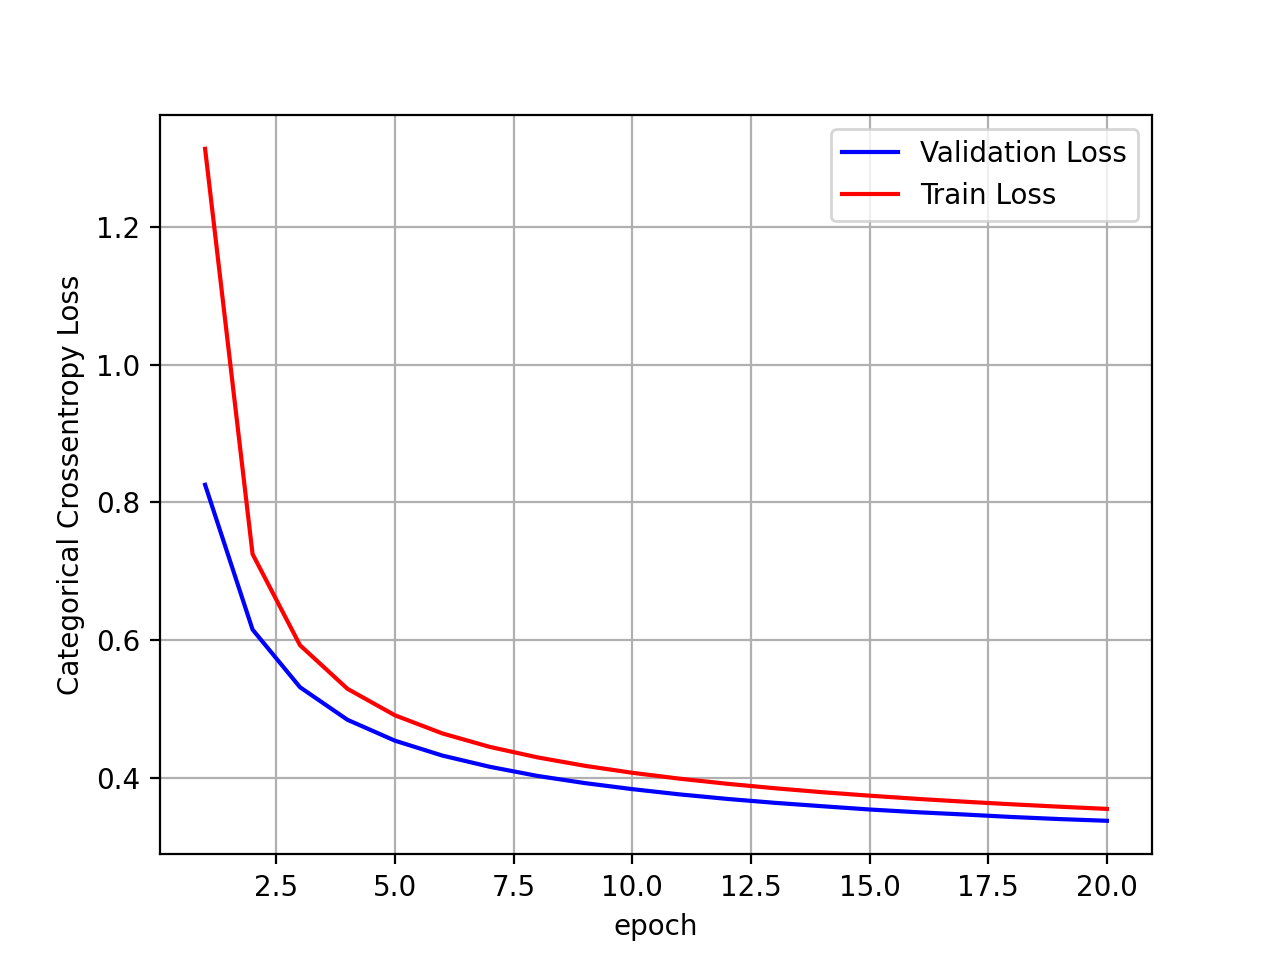

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [18]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 2.2672 - accuracy: 0.2175 - val_loss: 2.2217 - val_accuracy: 0.3825
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 2.1762 - accuracy: 0.4337 - val_loss: 2.1189 - val_accuracy: 0.5808
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 2.0563 - accuracy: 0.5615 - val_loss: 1.9740 - val_accuracy: 0.5710
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 1.8849 - accuracy: 0.6204 - val_loss: 1.7707 - val_accuracy: 0.6786
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 1.6638 - accuracy: 0.6720 - val_loss: 1.5329 - val_accuracy: 0.6866
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 1.4303 - accuracy: 0.7117 - val_loss: 1.3080 - val_accuracy: 0.7535
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2255 - accuracy: 0.7477 - val_loss: 1.1233 - val_accuracy: 0.7832
Epoch 

Test score: 0.45592930912971497
Test accuracy: 0.8810999989509583


<IPython.core.display.Javascript object>


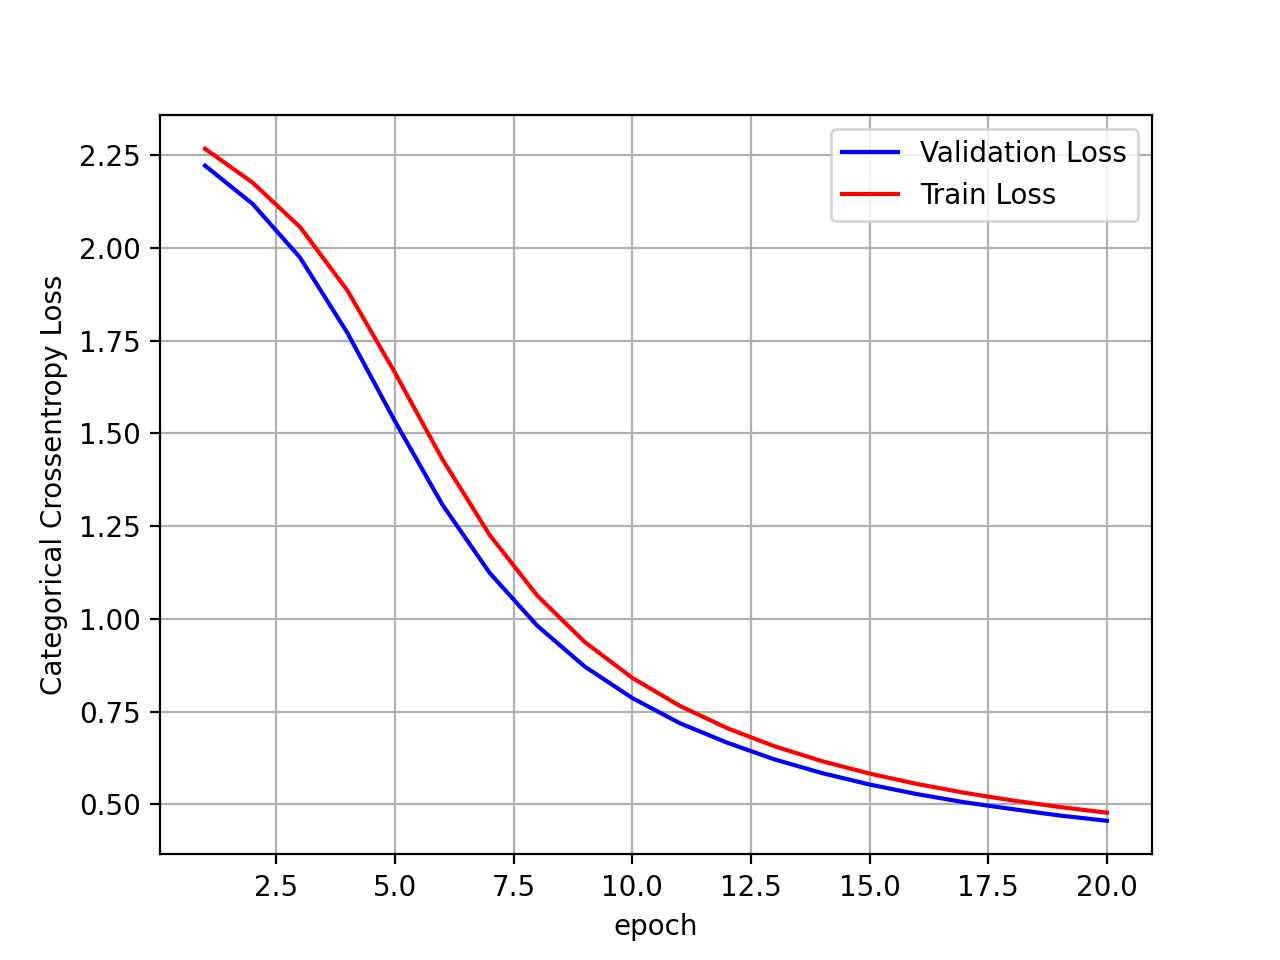

In [20]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


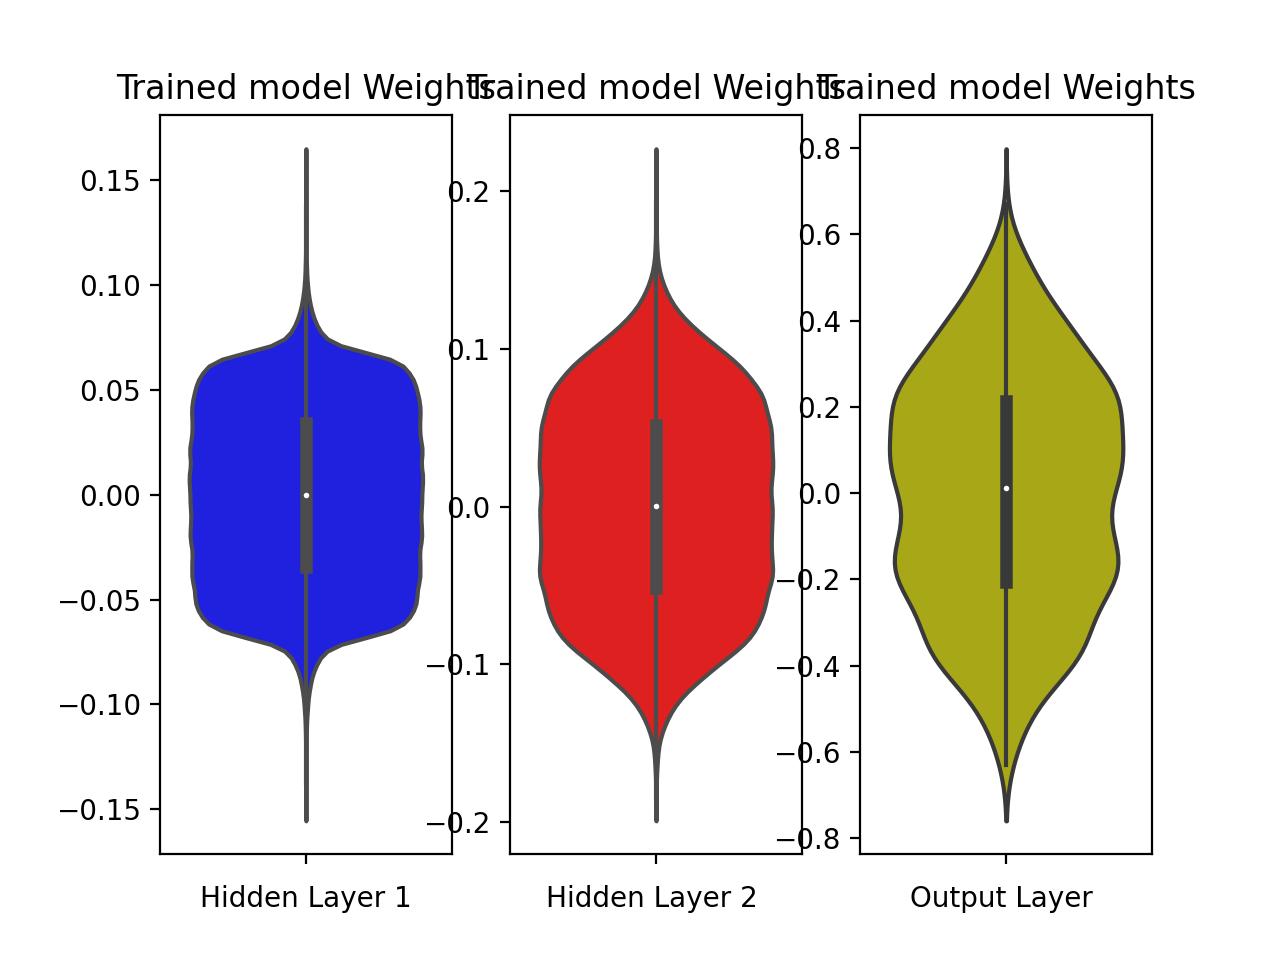

In [21]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [22]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5525 - accuracy: 0.8562 - val_loss: 0.2540 - val_accuracy: 0.9273
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2218 - accuracy: 0.9349 - val_loss: 0.1840 - val_accuracy: 0.9446
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1635 - accuracy: 0

Test score: 0.07037714868783951
Test accuracy: 0.9821000099182129


<IPython.core.display.Javascript object>


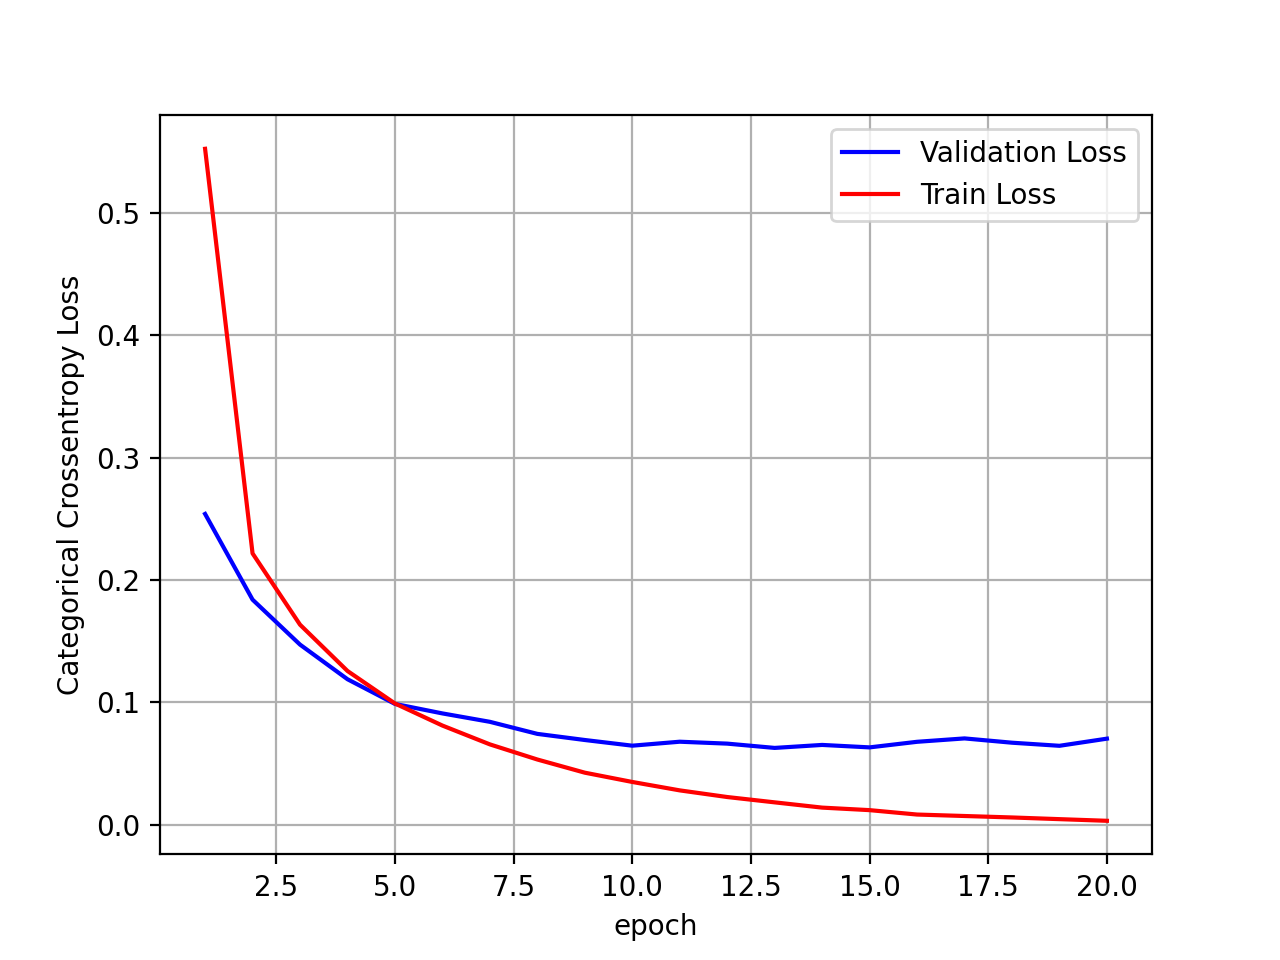

In [23]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


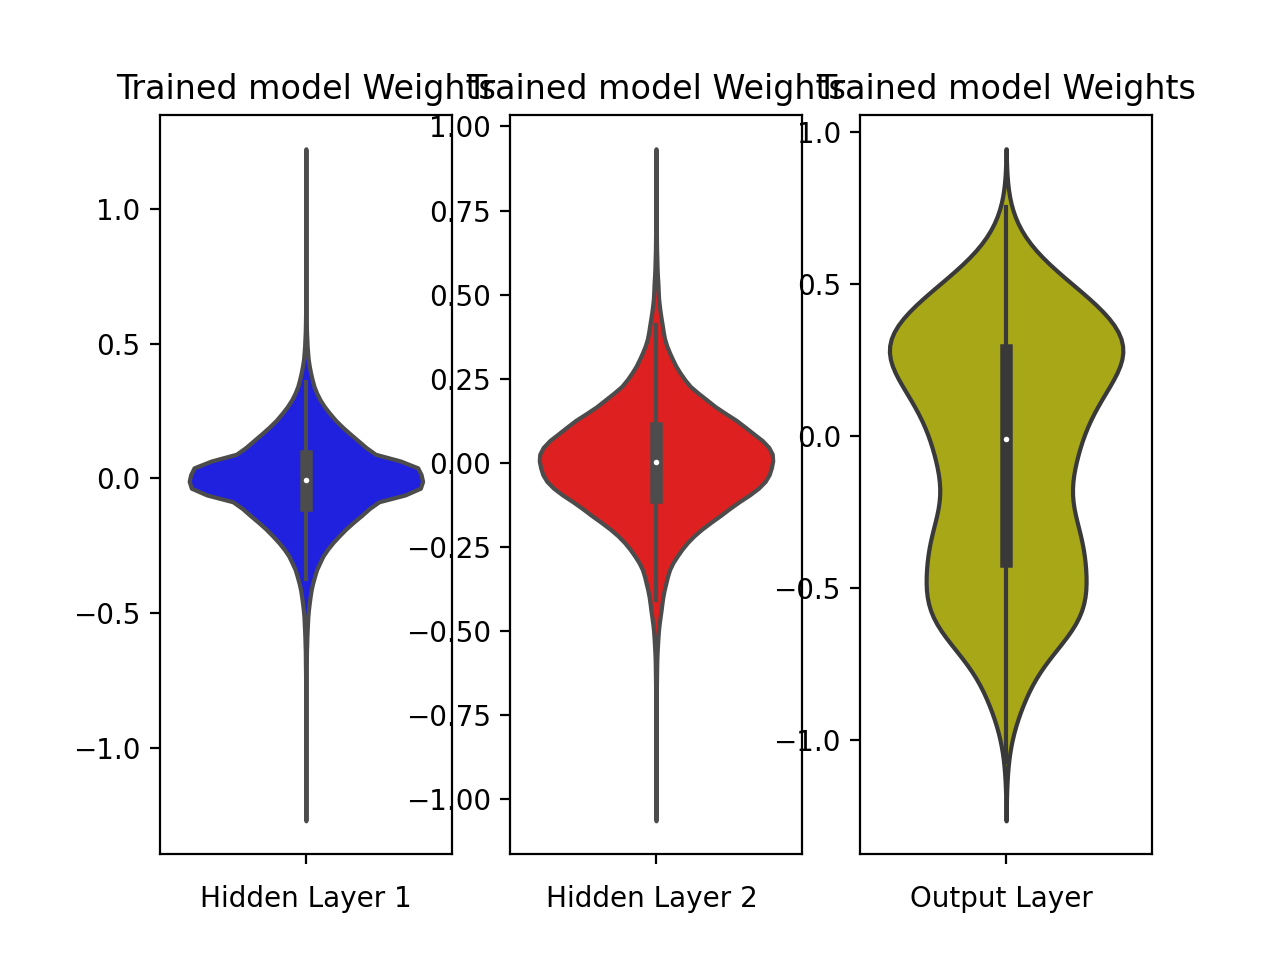

In [24]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [25]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in)  = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7620 - accuracy: 0.7884 - val_loss: 0.3932 - val_accuracy: 0.8899
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.9013 - val_loss: 0.2985 - val_accuracy: 0.9155
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.9185 - val_loss: 0.2625 - val_accuracy: 0.9243
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2535 - accuracy: 0.9274 - val_loss: 0.2331 - val_accuracy: 0.9347
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2294 - accuracy: 0.9344 - val_loss: 0.2160 - val_accuracy: 0.9376
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2109 - accuracy: 0.9407 - val_loss: 0.2013 - val_accuracy: 0.9436
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9446 - val_loss: 0.1902 - val_accuracy: 0.9448
Epoch 

Test score: 0.1199023574590683
Test accuracy: 0.9641000032424927


<IPython.core.display.Javascript object>


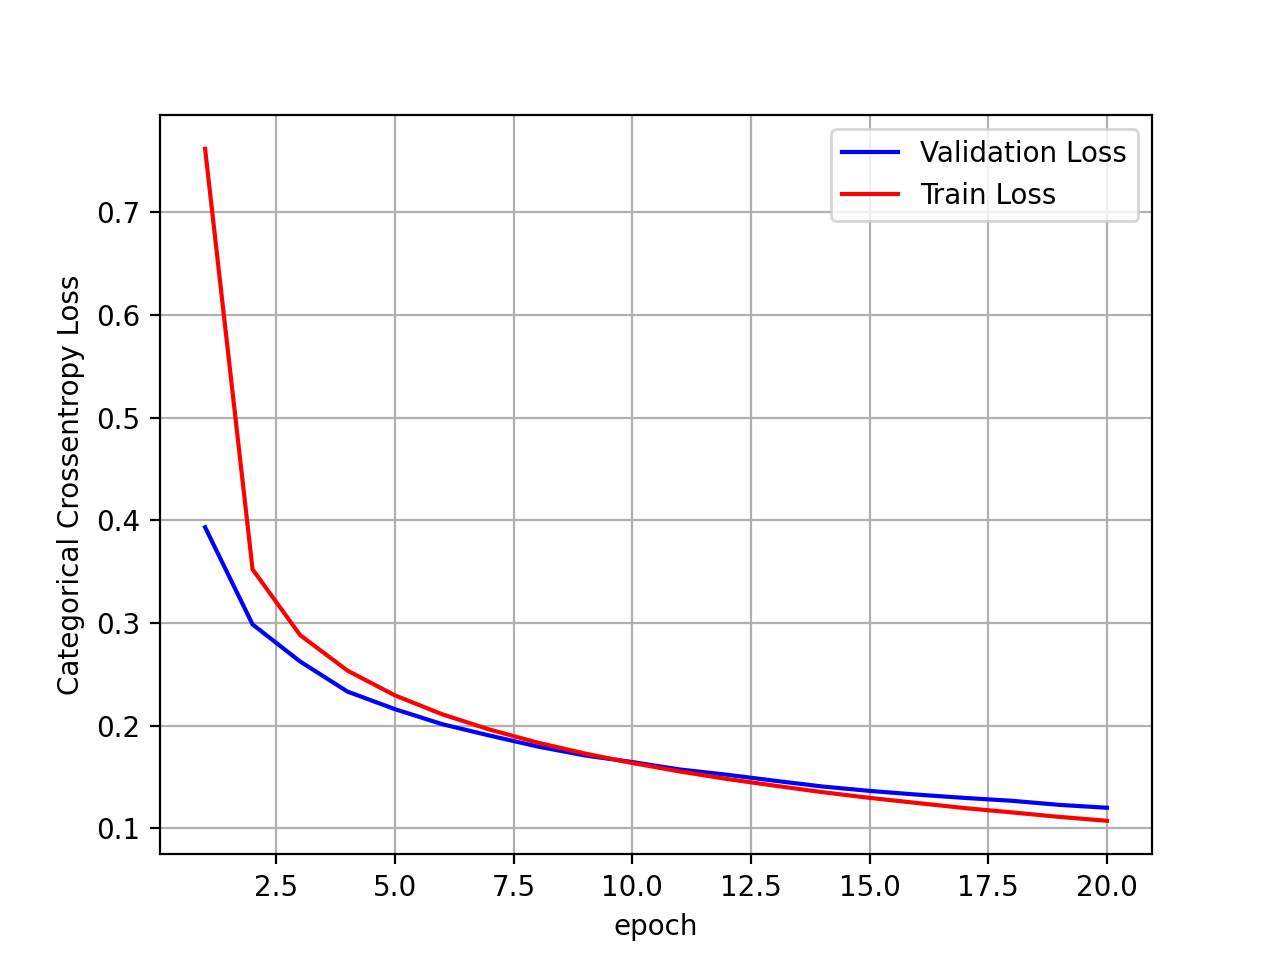

In [27]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


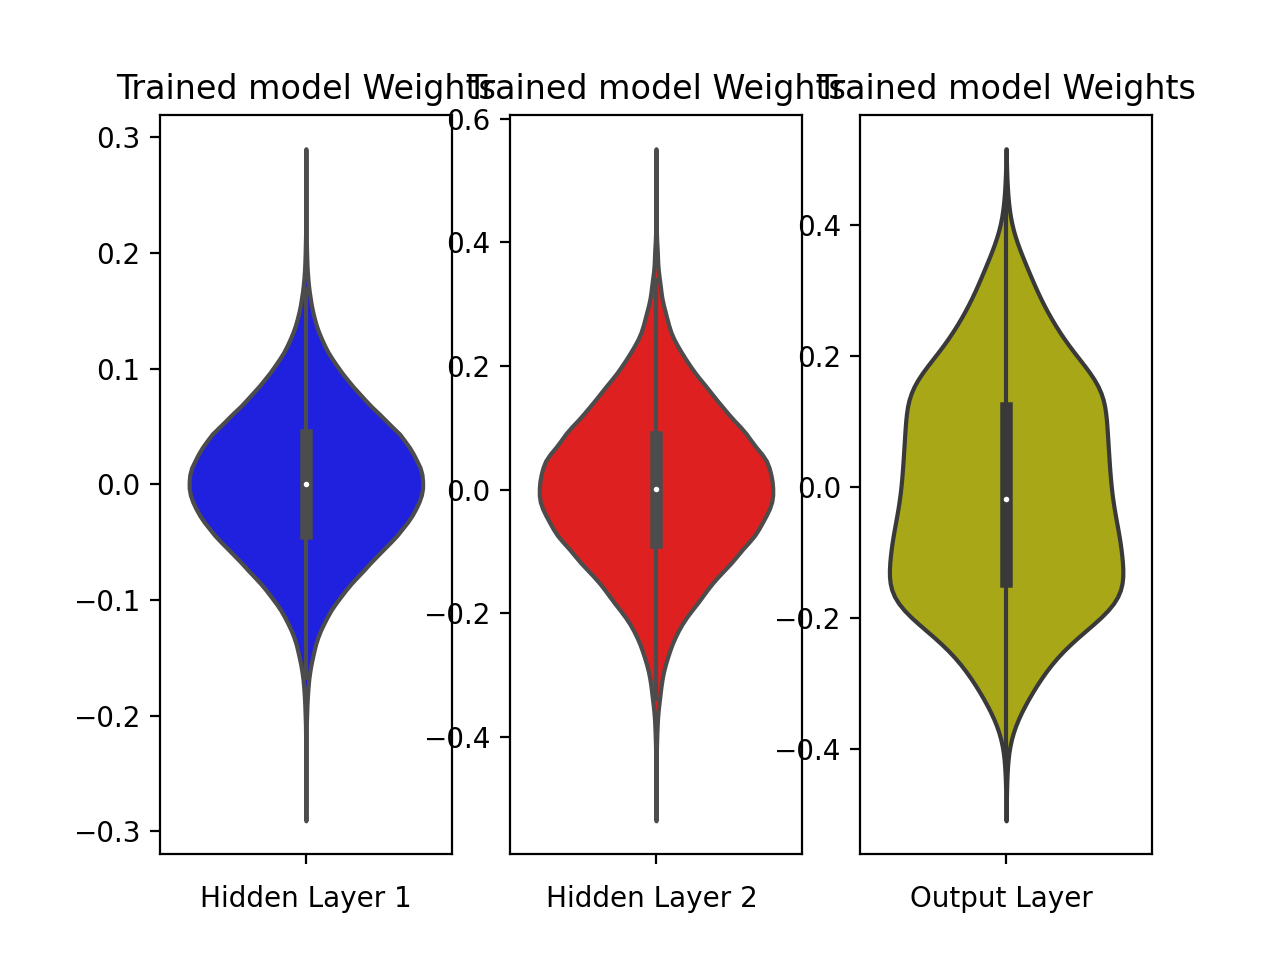

In [28]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [29]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9338 - val_loss: 0.1035 - val_accuracy: 0.9679
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0838 - accuracy: 0.9746 - val_loss: 0.0943 - val_accuracy: 0.9721
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0520 - accura

Test score: 0.09270462393760681
Test accuracy: 0.9836000204086304


<IPython.core.display.Javascript object>


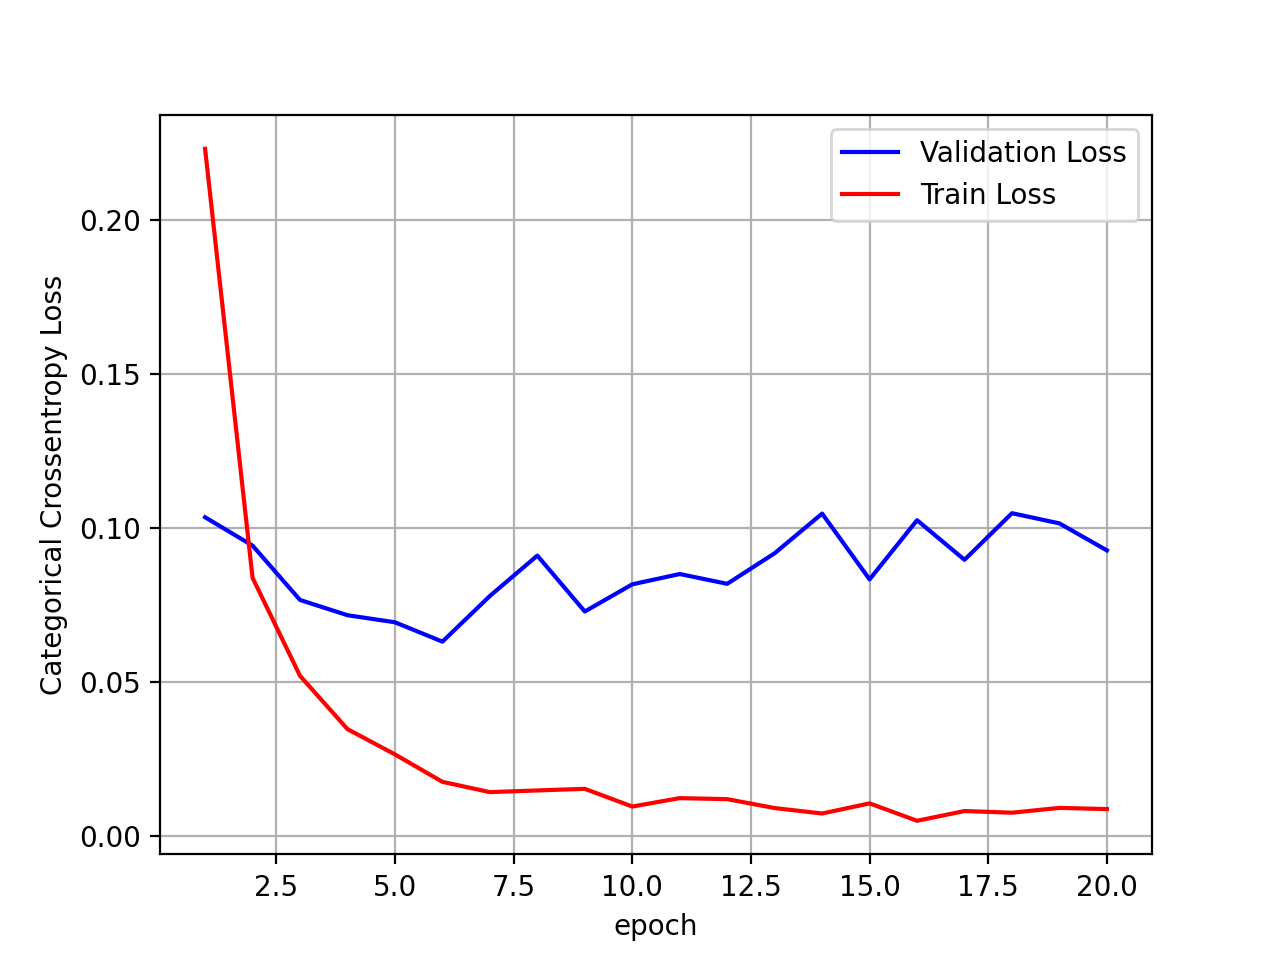

In [30]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


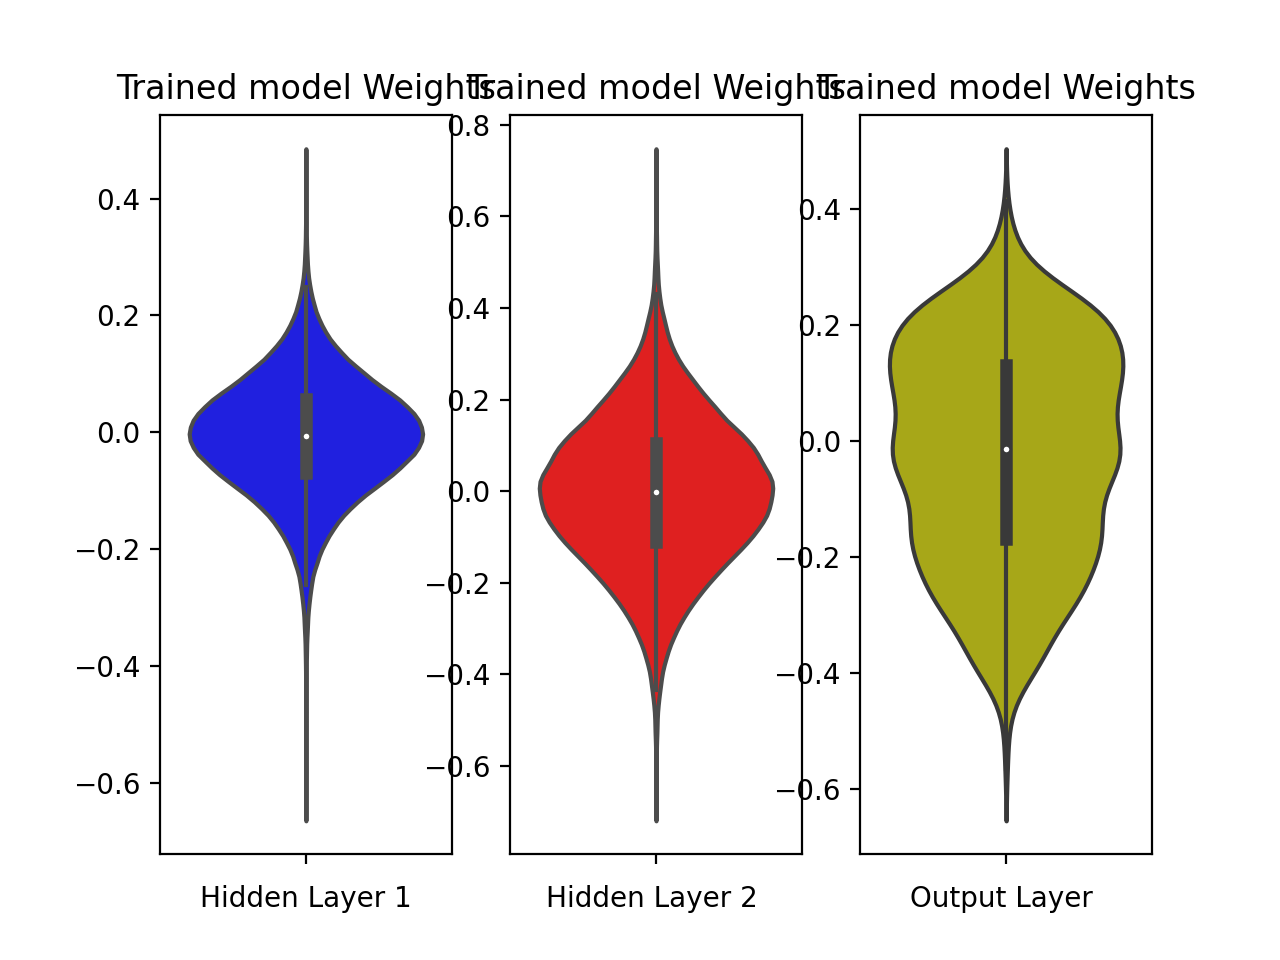

In [31]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [32]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [33]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2974 - accuracy: 0.9118 - val_loss: 0.2068 - val_accuracy: 0.9354
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1768 - accuracy: 0.9485 - val_loss: 0.1736 - val_accuracy: 0.9486
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1383 - accuracy: 0.9594 - val_loss: 0.1407 - val_accuracy: 0.9600
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1120 - accuracy: 0.9670 - val_loss: 0.1261 - val_accuracy: 0.9627
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0956 - accuracy: 0.9719 - val_loss: 0.1182 - val_accuracy: 0.9646
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0813 - accuracy: 0.9750 - val_loss: 0.1177 - val_accuracy: 0.9638
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.1074 - val_accuracy: 0.9689
Epoch 

Test score: 0.09723570942878723
Test accuracy: 0.9754999876022339


<IPython.core.display.Javascript object>


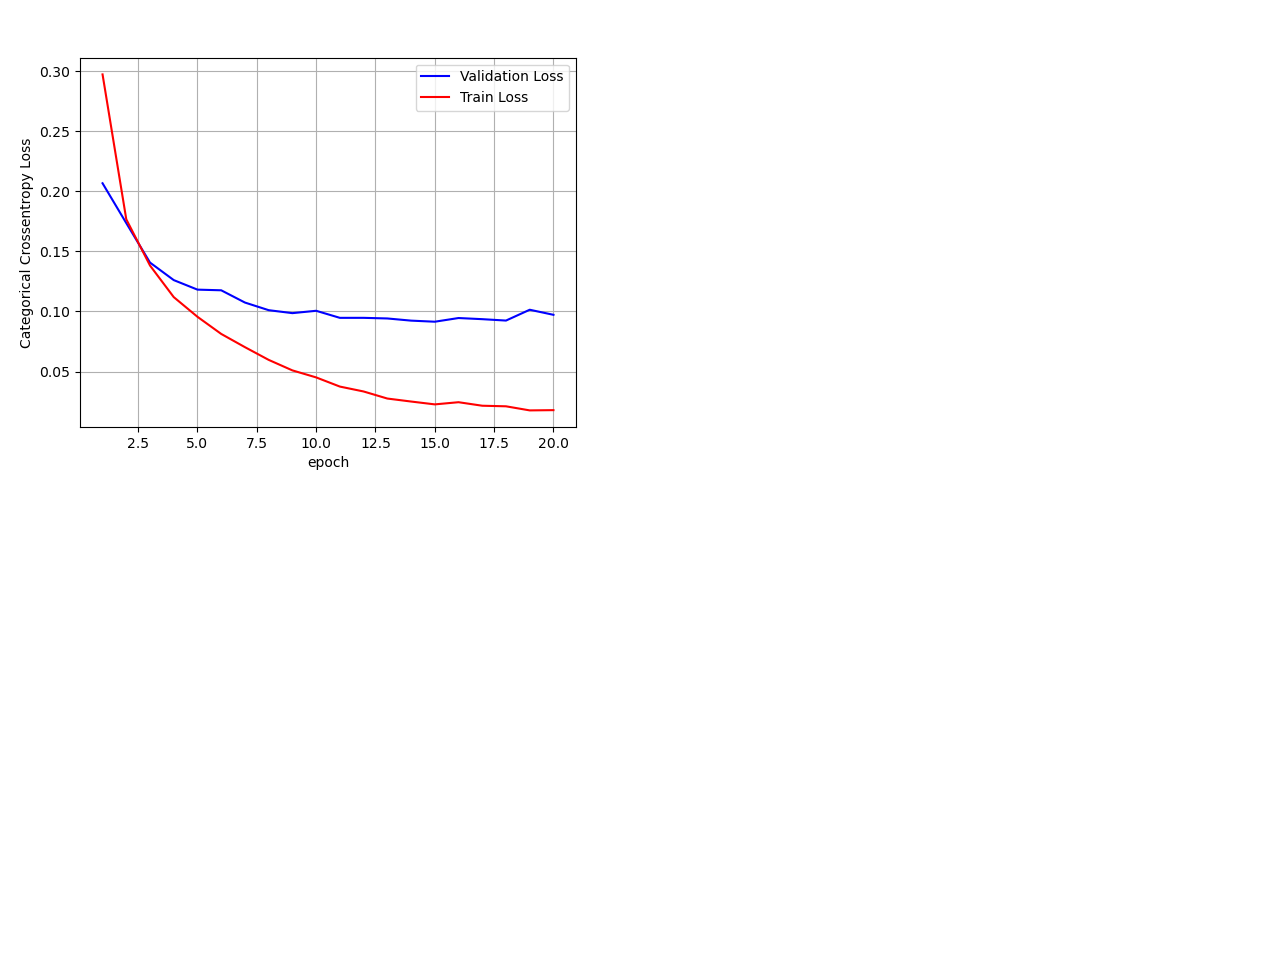

In [34]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


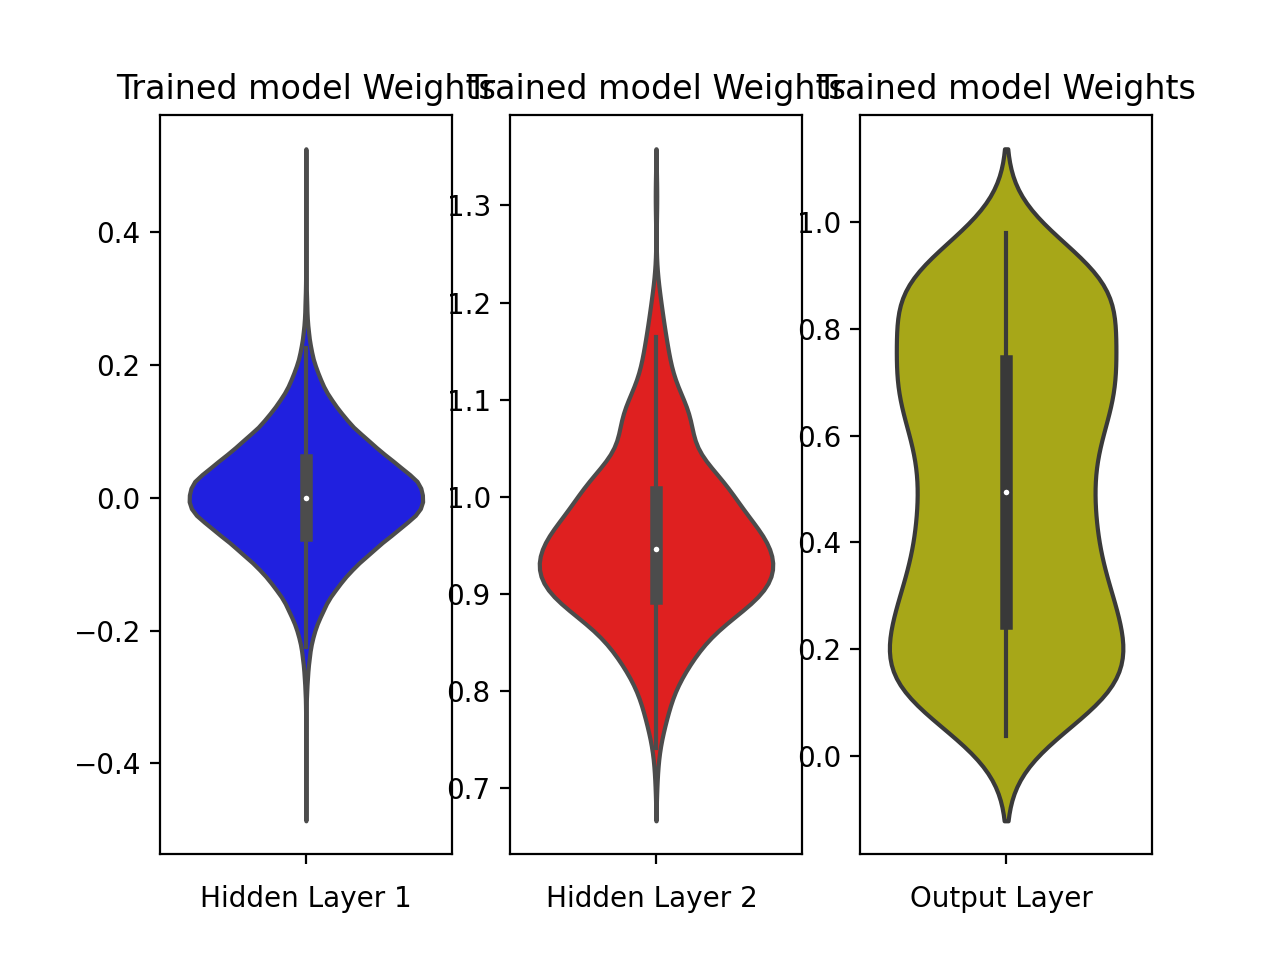

In [35]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [36]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [37]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 0.6735 - accuracy: 0.7937 - val_loss: 0.2902 - val_accuracy: 0.9137
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4294 - accuracy: 0.8684 - val_loss: 0.2512 - val_accuracy: 0.9250
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3815 - accuracy: 0.8842 - val_loss: 0.2383 - val_accuracy: 0.9270
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3585 - accuracy: 0.8912 - val_loss: 0.2246 - val_accuracy: 0.9342
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3388 - accuracy: 0.8971 - val_loss: 0.2137 - val_accuracy: 0.9375
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3202 - accuracy: 0.9023 - val_loss: 0.2015 - val_accuracy: 0.9395
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3099 - accuracy: 0.9077 - val_loss: 0.1928 - val_accuracy: 0.9411
Epoch 

Test score: 0.10512922704219818
Test accuracy: 0.9682999849319458


<IPython.core.display.Javascript object>


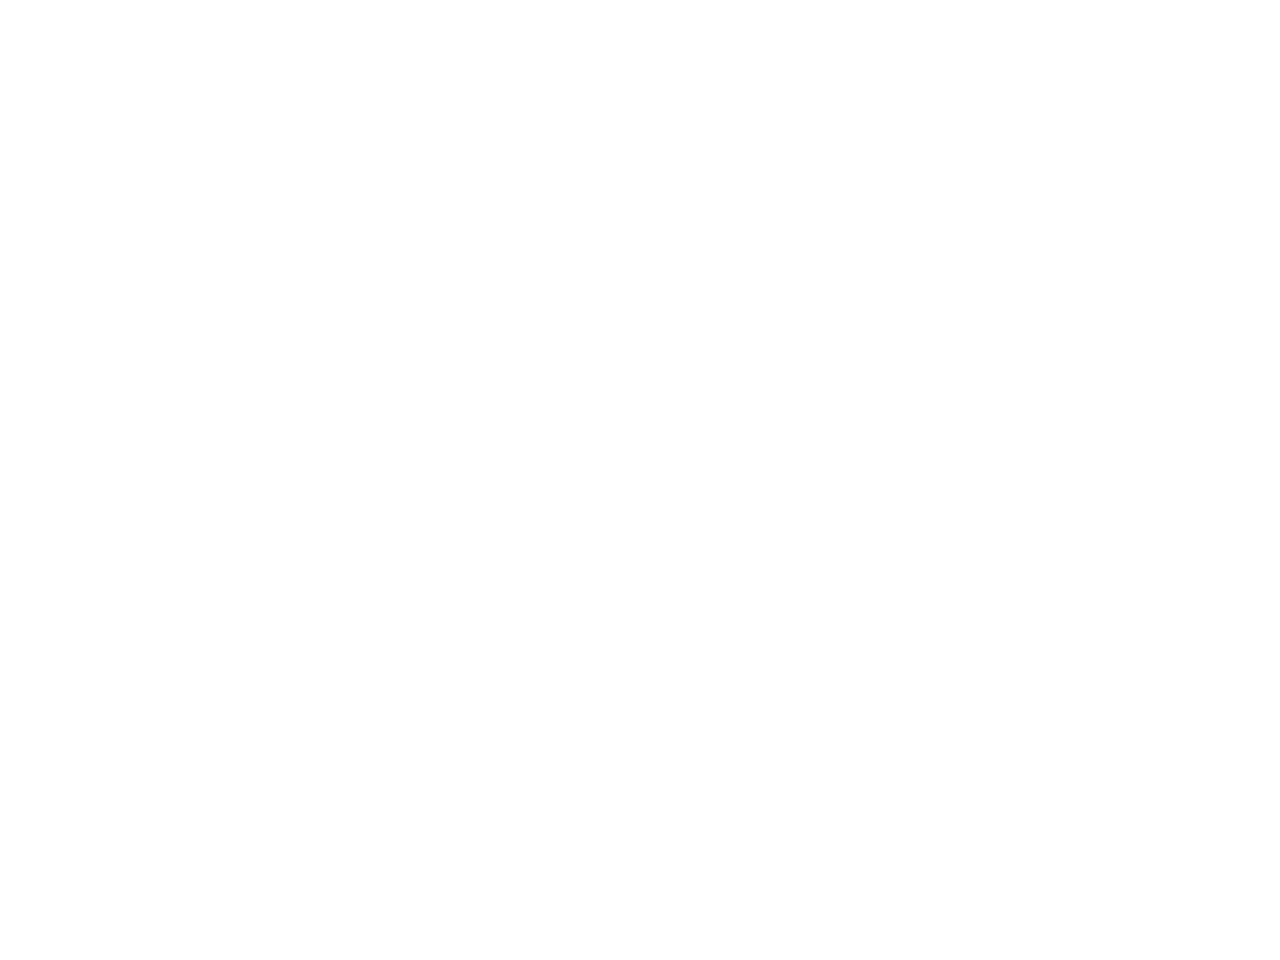

In [38]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


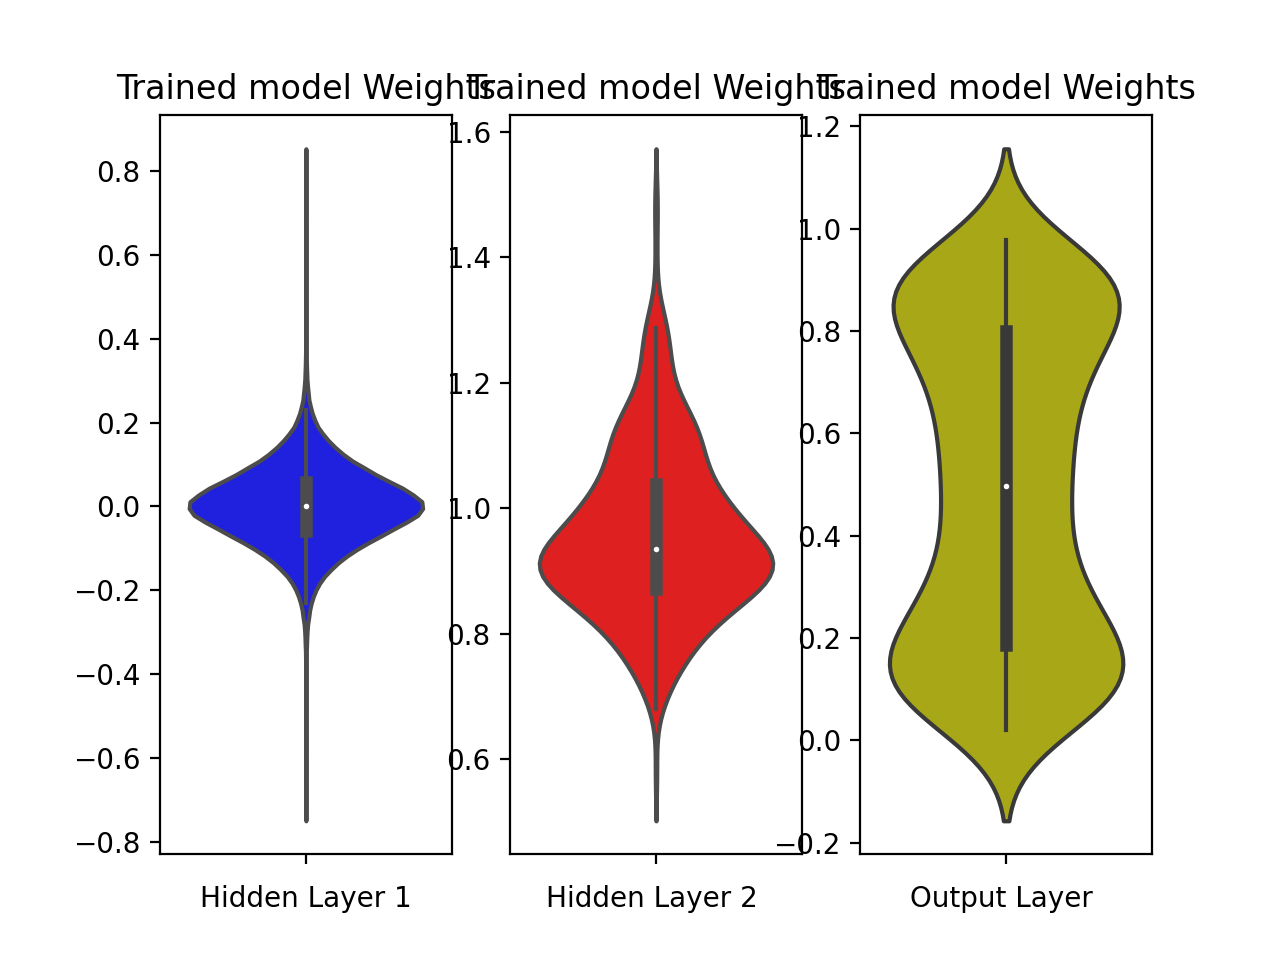

In [39]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP(2 HL ) +BN+ RELU+ADAM

In [40]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(364, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(100, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_4 (Batch (None, 364)               1456      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               36500     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 325,106
Trainable params: 324,178
Non-trainable params: 928
_________________________________________________________________


In [41]:

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3148 - accuracy: 0.9077 - val_loss: 0.2126 - val_accuracy: 0.9374
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1784 - accuracy: 0.9475 - val_loss: 0.1745 - val_accuracy: 0.9482
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1389 - accuracy: 0.9584 - val_loss: 0.1566 - val_accuracy: 0.9534
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9662 - val_loss: 0.1384 - val_accuracy: 0.9576
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0940 - accuracy: 0.9721 - val_loss: 0.1192 - val_accuracy: 0.9645
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9768 - val_loss: 0.1224 - val_accuracy: 0.9640
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9797 - val_loss: 0.1175 - val_accuracy: 0.9637
Epoch 

<IPython.core.display.Javascript object>


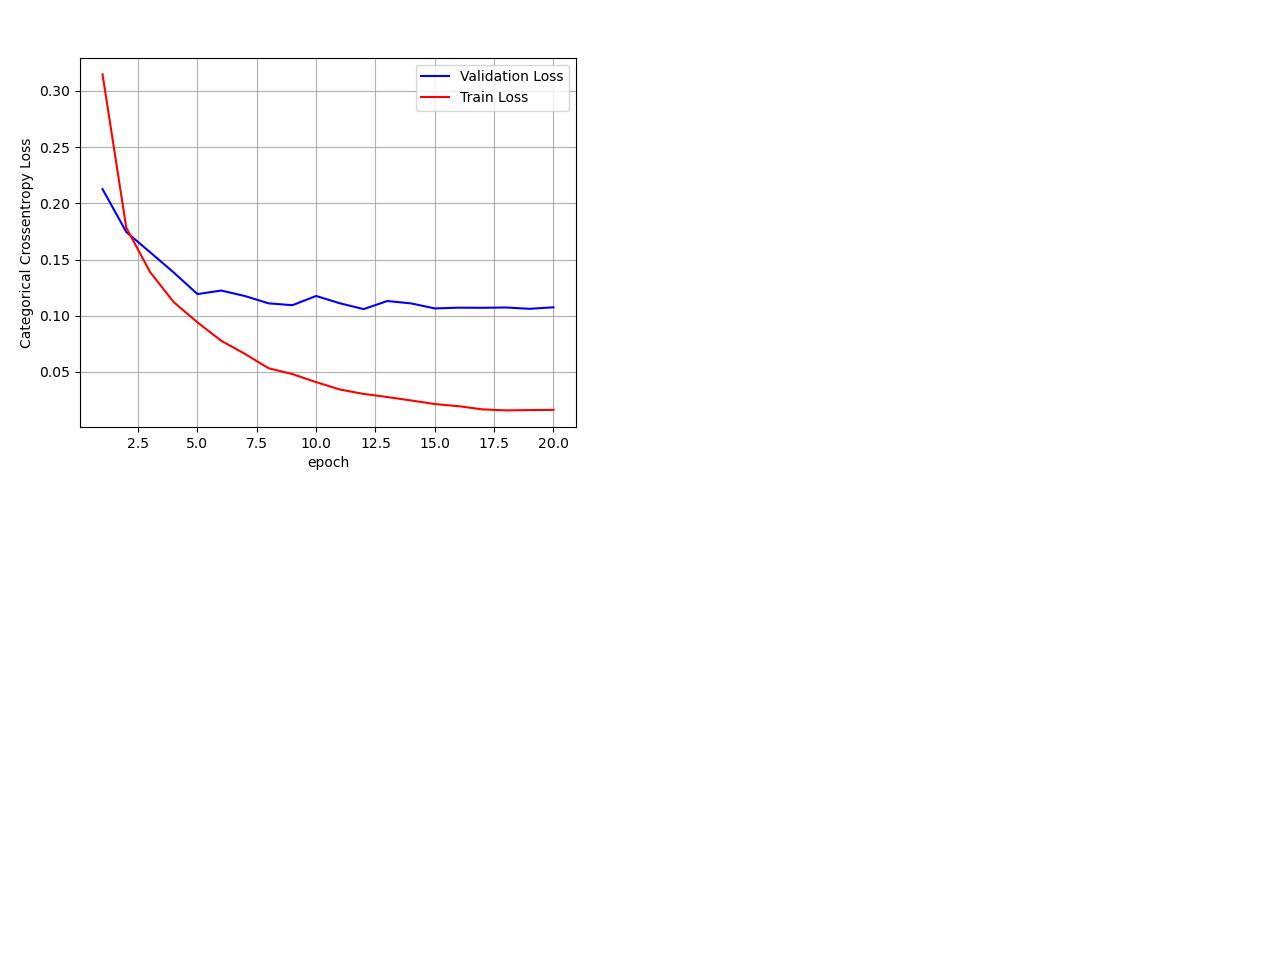

In [42]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP(3 HL ) +BN+ RELU+ADAM

In [45]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='sigmoid', kernel_initializer='he_uniform') )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

In [46]:

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])




Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2432 - accuracy: 0.9284 - val_loss: 0.1788 - val_accuracy: 0.9513
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1176 - accuracy: 0.9647 - val_loss: 0.1032 - val_accuracy: 0.9681
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0741 - accuracy: 0.9769 - val_loss: 0.0853 - val_accuracy: 0.9723
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0546 - accuracy: 0.9827 - val_loss: 0.0779 - val_accuracy: 0.9749
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0786 - val_accuracy: 0.9757
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0347 - accuracy: 0.9882 - val_loss: 0.0874 - val_accuracy: 0.9732
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0285 - accuracy: 0.9905 - val_loss: 0.0705 - val_accuracy: 0.9783
Epoch 

<IPython.core.display.Javascript object>


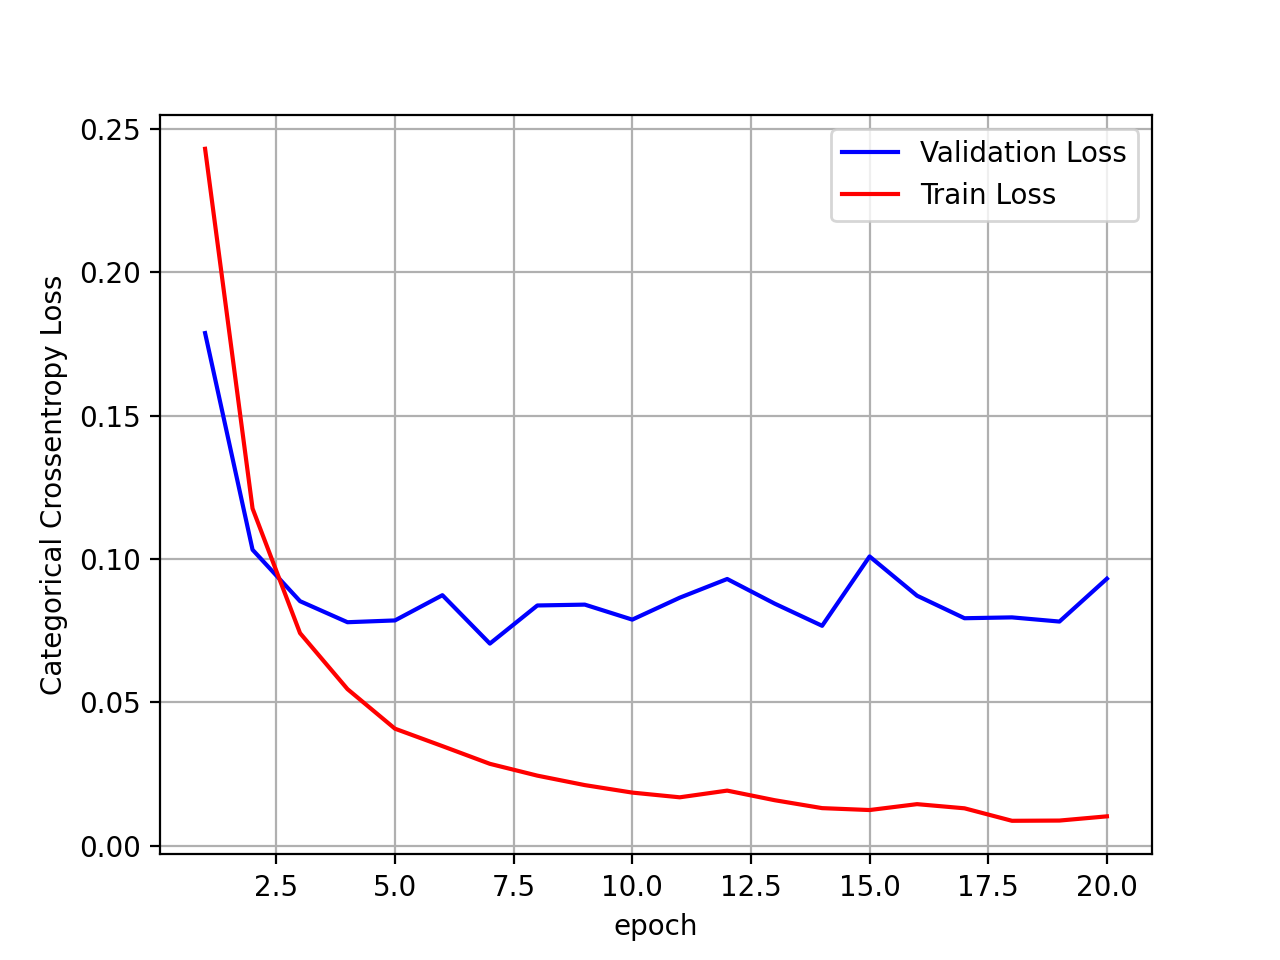

In [47]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP(5 HL ) +BN+ RELU+ADAM

In [48]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(384, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(196, activation='sigmoid', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='sigmoid', kernel_initializer='he_uniform') )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dense_32 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_13 (Batc (None, 384)               1536      
_________________________________________________________________
dense_33 (Dense)             (None, 256)               98560     
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
dense_34 (Dense)             (None, 196)             

In [49]:

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])





Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2345 - accuracy: 0.9303 - val_loss: 0.1550 - val_accuracy: 0.9524
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1136 - accuracy: 0.9658 - val_loss: 0.1100 - val_accuracy: 0.9654
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0779 - accuracy: 0.9761 - val_loss: 0.0995 - val_accuracy: 0.9695
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0607 - accuracy: 0.9807 - val_loss: 0.0852 - val_accuracy: 0.9762
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0493 - accuracy: 0.9837 - val_loss: 0.1001 - val_accuracy: 0.9718
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0895 - val_accuracy: 0.9736
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 0.0772 - val_accuracy: 0.9774


<IPython.core.display.Javascript object>


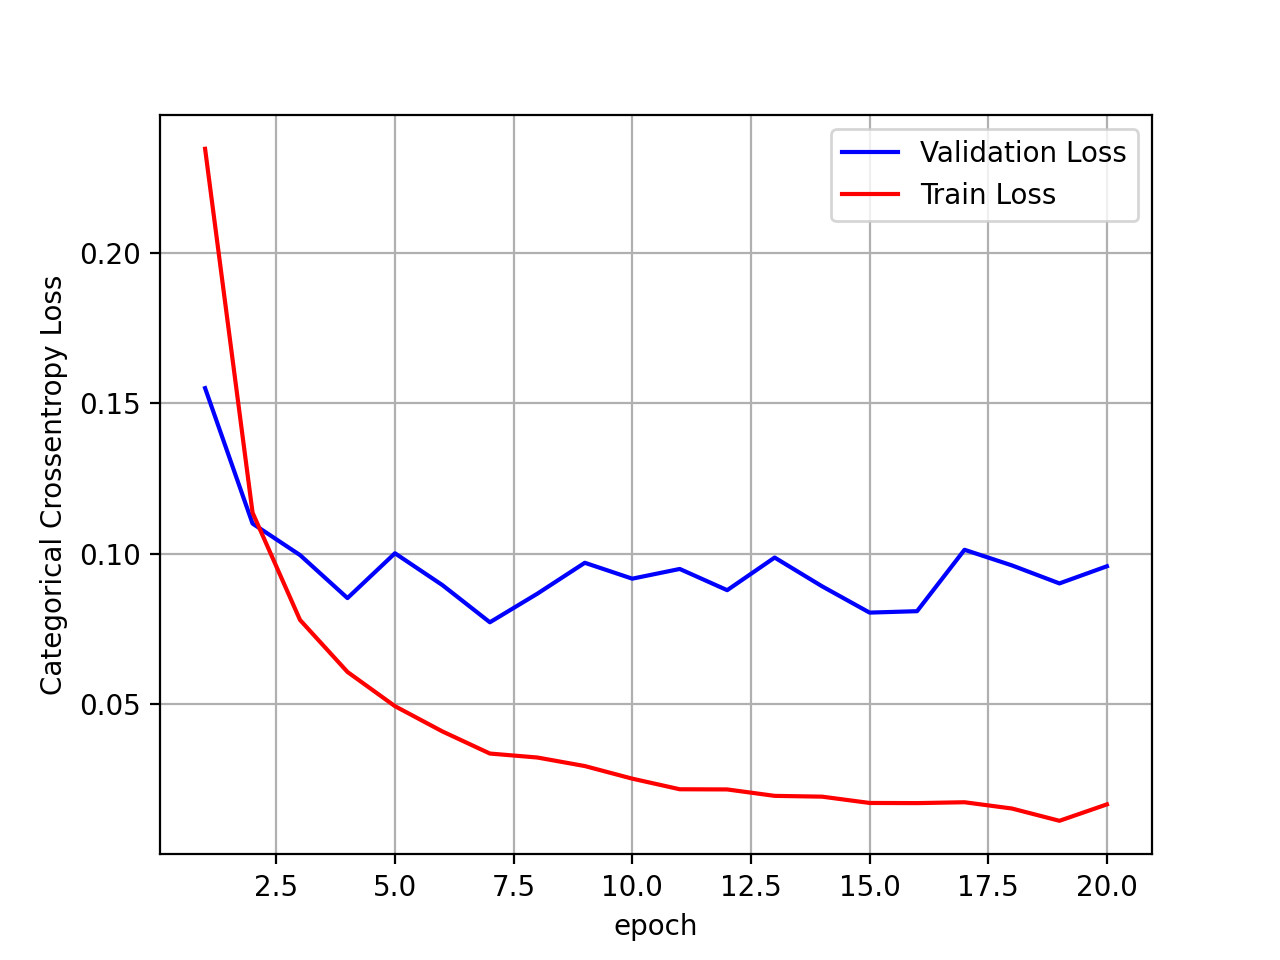

In [50]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [66]:

# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer='he_uniform') )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_29 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)              

In [67]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4232 - accuracy: 0.8720 - val_loss: 0.1427 - val_accuracy: 0.9561
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2072 - accuracy: 0.9373 - val_loss: 0.1002 - val_accuracy: 0.9671
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1614 - accuracy: 0.9509 - val_loss: 0.0939 - val_accuracy: 0.9704
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1370 - accuracy: 0.9584 - val_loss: 0.0808 - val_accuracy: 0.9741
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1185 - accuracy: 0.9632 - val_loss: 0.0759 - val_accuracy: 0.9761
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1119 - accuracy: 0.9654 - val_loss: 0.0704 - val_accuracy: 0.9771
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1012 - accuracy: 0.9683 - val_loss: 0.0671 - val_accuracy: 0.9790
Epoch 

<IPython.core.display.Javascript object>


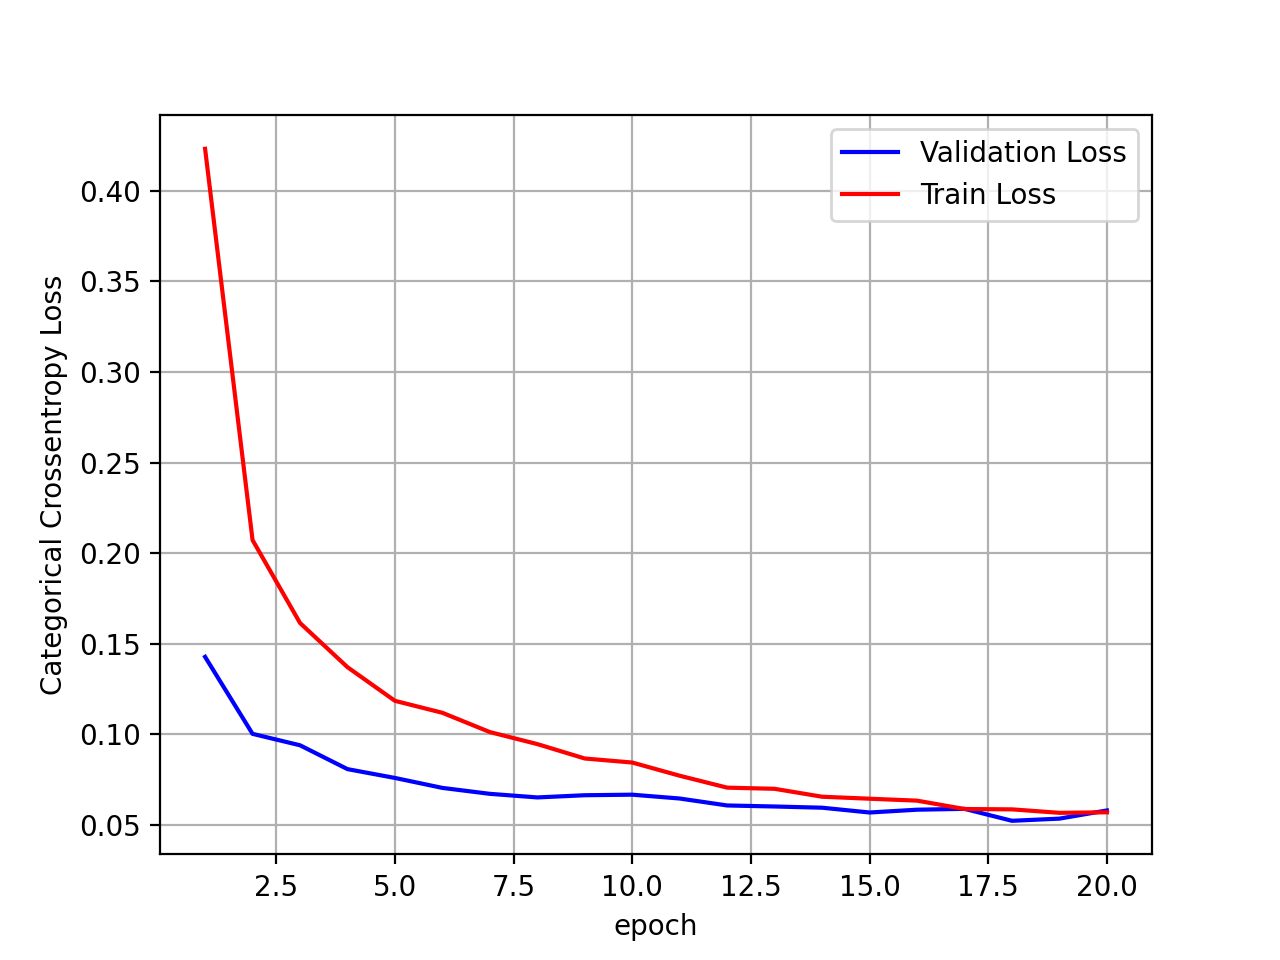

In [68]:




fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP(3 HL) + Dropout + AdamOptimizer </h2>

In [70]:

# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(384, activation='relu', kernel_initializer='he_uniform' ))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer='he_uniform') )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_32 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_17 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)             

In [71]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5390 - accuracy: 0.8358 - val_loss: 0.1639 - val_accuracy: 0.9487
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2384 - accuracy: 0.9300 - val_loss: 0.1132 - val_accuracy: 0.9645
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1816 - accuracy: 0.9456 - val_loss: 0.0984 - val_accuracy: 0.9705
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1579 - accuracy: 0.9532 - val_loss: 0.0896 - val_accuracy: 0.9723
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1387 - accuracy: 0.9594 - val_loss: 0.0794 - val_accuracy: 0.9769
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1191 - accuracy: 0.9645 - val_loss: 0.0727 - val_accuracy: 0.9773
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1162 - accuracy: 0.9651 - val_loss: 0.0745 - val_accuracy: 0.9777
Epoch 

<IPython.core.display.Javascript object>


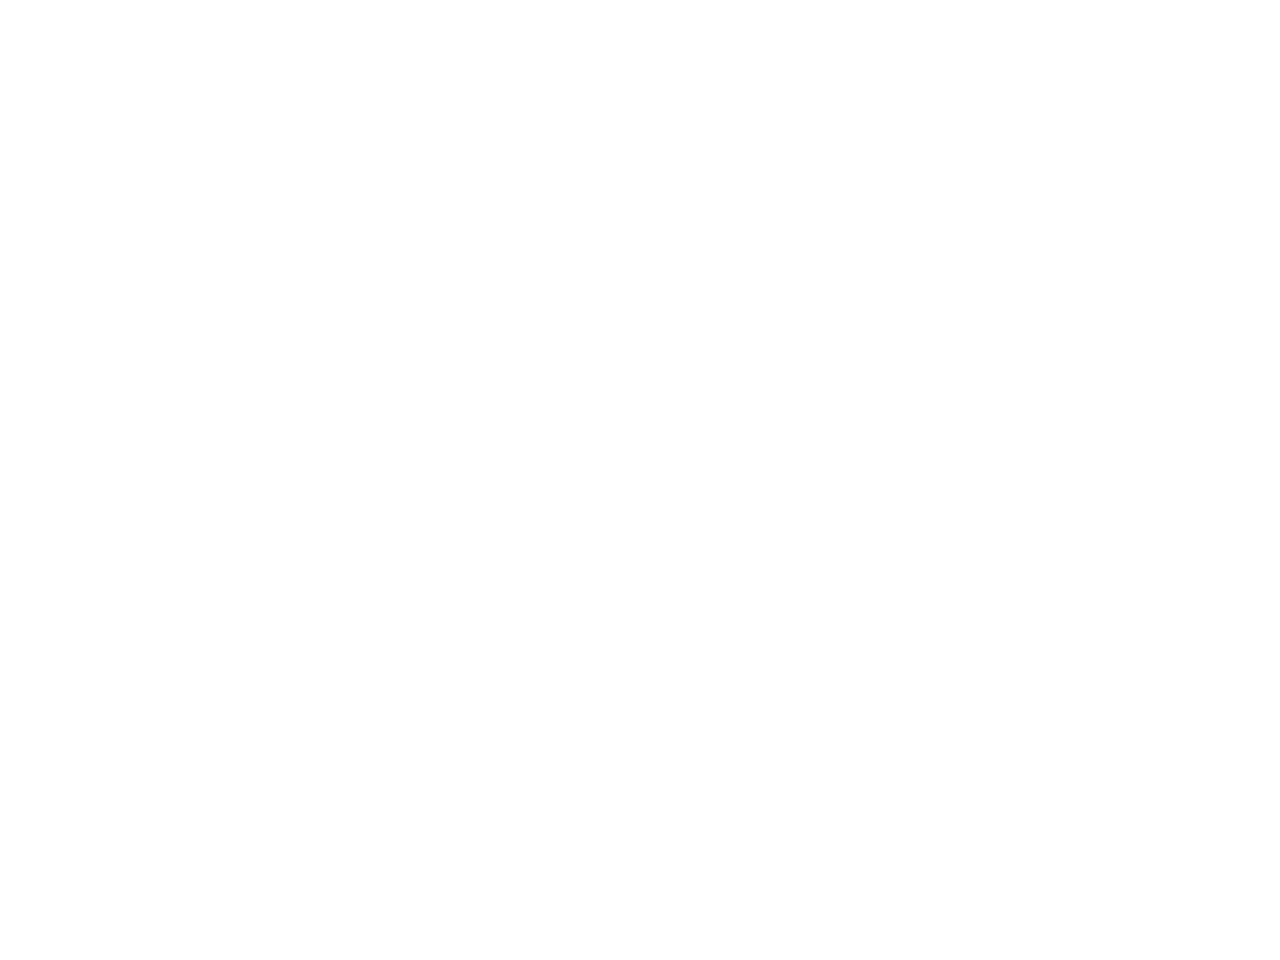

In [72]:




fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP(5 HL) + Dropout + AdamOptimizer </h2>

In [74]:

# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_uniform'))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(384, activation='relu', kernel_initializer='he_uniform') )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer='he_uniform' ))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(196, activation='relu', kernel_initializer='he_uniform') )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))



model_drop.add(Dense(128, activation='relu', kernel_initializer='he_uniform') )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_39 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_40 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_25 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)             

In [75]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])




Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 1.0146 - accuracy: 0.6861 - val_loss: 0.2537 - val_accuracy: 0.9229
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3520 - accuracy: 0.8997 - val_loss: 0.1680 - val_accuracy: 0.9519
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2586 - accuracy: 0.9276 - val_loss: 0.1288 - val_accuracy: 0.9637
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2197 - accuracy: 0.9382 - val_loss: 0.1106 - val_accuracy: 0.9685
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1864 - accuracy: 0.9479 - val_loss: 0.1028 - val_accuracy: 0.9714
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1701 - accuracy: 0.9534 - val_loss: 0.0928 - val_accuracy: 0.9743
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1561 - accuracy: 0.9568 - val_loss: 0.0986 - val_accuracy: 0.9731

<IPython.core.display.Javascript object>


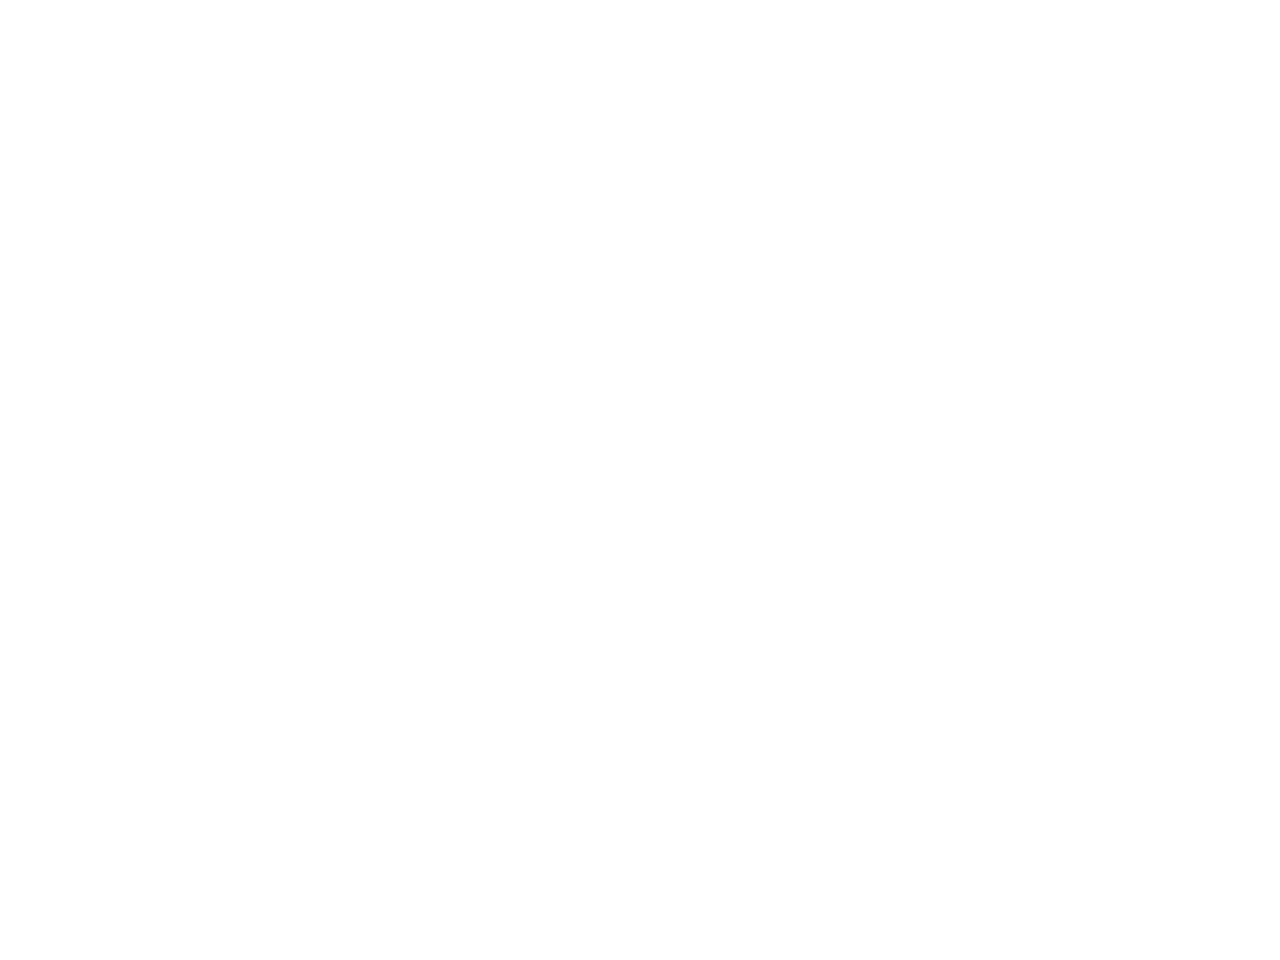

In [76]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [ ]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [ ]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975633 using {'activ': 'relu'}
0.974650 (0.001138) with: {'activ': 'sigmoid'}
0.975633 (0.002812) with: {'activ': 'relu'}
